In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the Excel file

file_path = r"C:\Users\Madhu\Desktop\Churn ML Project DBMS\Prediction_Data1.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11850-MAH    Male   74     Yes     Maharashtra                    5   
1   11873-HAR    Male   45     Yes         Haryana                    9   
2   11878-RAJ    Male   75     Yes       Rajasthan                   15   
3   11882-BIH  Female   74      No           Bihar                   14   
4   11887-MAD  Female   33      No  Madhya Pradesh                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6        NaN           Yes            Yes  ...   
1                10     Deal 2           Yes             No  ...   
2                17        NaN           Yes             No  ...   
3                15     Deal 5           Yes             No  ...   
4                33     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      75.150002   3480.350098           0.0   
1      Cre

In [12]:
print(data.columns.tolist())

['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status']


In [26]:
# Step 1: Remove rows where Customer_Status is missing
data = data[data['Customer_Status'].isin(['Stayed', 'Churned'])]

# Step 2: Encode target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Step 3: Label encode categorical columns
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 4: Prepare features and labels
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Step 5: Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [24]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

 

#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

ValueError: Input y contains NaN.

In [28]:
print("Rows in dataset:", len(data))
print(data['Customer_Status'].value_counts(dropna=False))

Rows in dataset: 0
Series([], Name: count, dtype: int64)


In [30]:
print("Unique values in Customer_Status:")
print(data['Customer_Status'].unique())

Unique values in Customer_Status:
[]


In [36]:
data = data[data['Customer_Status'].isin(['Stayed', 'Churned'])]

In [40]:
print("Rows after filtering:", len(data))
print(data['Customer_Status'].value_counts(dropna=False))

Rows after filtering: 0
Series([], Name: count, dtype: int64)


In [42]:
print(data.columns.tolist())


['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status']


In [44]:
print("Unique values in Customer_Status column:")
print(data['Customer_Status'].unique())

Unique values in Customer_Status column:
[]


In [46]:
print(data['Customer_Status'].isnull().sum())  # How many are NaN
print(data['Customer_Status'].head(10))        # Show first 10 values

0
Series([], Name: Customer_Status, dtype: int64)


In [48]:
print(data['Customer_Status'].value_counts(dropna=False))


Series([], Name: count, dtype: int64)


In [58]:
import pandas as pd

# Load the data
data = pd.read_excel(r"C:\Users\Madhu\Desktop\Churn ML Project DBMS\Prediction_Data1.xlsx")

# Confirm it's loaded correctly
print("Number of rows:", len(data))
print("Columns:", data.columns.tolist())
print("Unique Customer_Status values:", data['Customer_Status'].unique())
print("Value counts:\n", data['Customer_Status'].value_counts(dropna=False))


Number of rows: 6007
Columns: ['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
Unique Customer_Status values: ['Stayed' 'Churned']
Value counts:
 Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64


In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [62]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts())


Training set shape: (4805, 28)
Test set shape: (1202, 28)
Training target distribution:
 Customer_Status
0    3394
1    1411
Name: count, dtype: int64


In [66]:
%matplotlib inline

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
[[830  51]
 [117 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       881
           1       0.80      0.64      0.71       321

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.86      0.86      0.85      1202



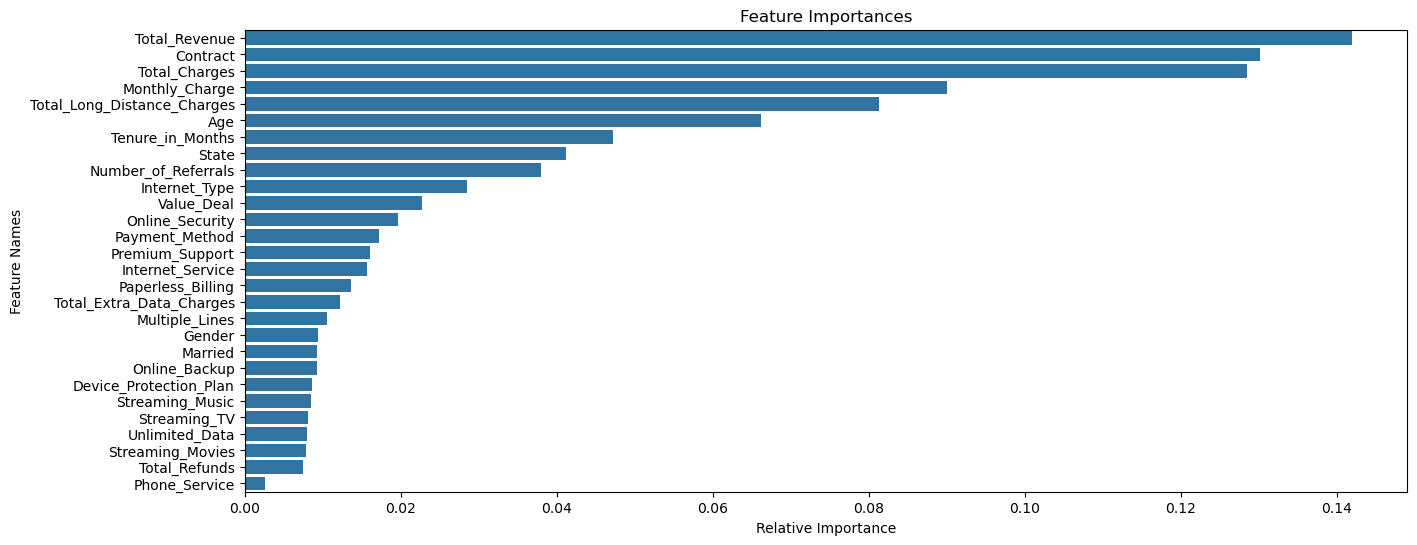

In [72]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

 

#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [74]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\Madhu\Desktop\Churn ML Project DBMS\Prediction_Data1.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"C:\Users\Madhu\Desktop\Churn ML Project DBMS\Predictions.csv", index=False)

print("Predictions saved to CSV successfully!")

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   17796-BIH  Female   65      No        Bihar                    5   
1   18015-ODI  Female   28     Yes       Odisha                   15   
2   21165-DEL  Female   38      No        Delhi                    2   
3   21247-ASS    Male   58     Yes        Assam                    2   
4   21288-MAH  Female   63      No  Maharashtra                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                 9        NaN           Yes             No  ...   
2                32     Deal 5           Yes             No  ...   
3                 2        NaN           Yes             No  ...   
4                34        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      48.450001     48.450001           0.0   
1  Bank Withdrawal      49.9